<a href="https://colab.research.google.com/github/AvaCook/cs315/blob/main/QuicksortPoCkey_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ava Cook HW 4
Used ChatGPT to help with Ratio test and matplotlib visualization

In [14]:

import random
import time
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(50000) #makes recursion limit higher to test ordered data

In [9]:

# Partition function
def Partition(A, p, r):
    x = A[r]
    i = p - 1
    for j in range(p, r):
        if A[j] <= x:
            i = i + 1
            # swap A[i] <--> A[j]
            A[i], A[j] = A[j], A[i]
    # swap A[i+1] <--> A[r]
    A[i+1], A[r] = A[r], A[i+1]
    return i + 1


In [10]:

# Quicksort implementation
def Quicksort(A, p, r, print_flag=False):
    if p < r:
        q = Partition(A, p, r)
        if print_flag:
            print(A)
        Quicksort(A, p, q-1, print_flag)
        Quicksort(A, q+1, r, print_flag)
    return A

In [15]:
# Wrapper to call Quicksort easily
def quicksort_driver(A, print_flag=False):
    return Quicksort(A, 0, len(A)-1, print_flag)

# --- Data generation helper ---
def generate_input_list(n, randomize=True):
    if randomize:
        # Random data
        return [random.randint(1, 100000) for _ in range(n)]
    else:
        # Already sorted data
        return list(range(1, n+1))

# Timing wrapper
def time_algorithm(algorithm, arr):
    start = time.time()
    algorithm(arr.copy())
    end = time.time()
    return end - start

# Test sizes for Quicksort
Ns = [1000, 2000, 5000, 10000, 20000]
times = []

for n in Ns:
    arr = generate_input_list(n, randomize=True)
    t = time_algorithm(quicksort_driver, arr)
    times.append(t)

N values: [1000, 2000, 5000, 10000, 20000]
Times: [0.0012819766998291016, 0.0022344589233398438, 0.006586551666259766, 0.015264511108398438, 0.03502011299133301]
Ratios (T(2n)/T(n)): [1.7429793565185048, 2.9477166026461803, 2.317526967349598, 2.294217793327502]


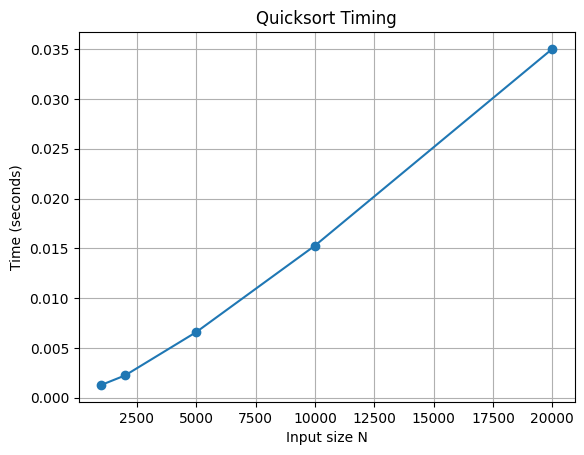

In [16]:
# Print results
print("N values:", Ns)
print("Times:", times)

# Ratio Test (expected ~2 since O(n log n))
ratios = []
for i in range(1, len(times)):
    ratios.append(times[i] / times[i-1])
print("Ratios (T(2n)/T(n)):", ratios)

# Plot
plt.plot(Ns, times, marker='o')
plt.xlabel('Input size N')
plt.ylabel('Time (seconds)')
plt.title('Quicksort Timing')
plt.grid(True)
plt.show()